## **SOLO LO HICE PARA PCA**

In [1]:
from scripts.cargar_datos_cifar import clases_cifar
from scripts.ver_umap import visualizar_umap

# **PATHS**

In [ ]:
from pathlib import Path

cifar100_path = Path("../datos/cifar-10-batches-py")
resultados_path = Path("../resultados/06-tSNE")

# **CLASES E HIPERPARÁMETROS**

In [3]:
clases = ['bird', 'automobile', 'cat', 'deer']

In [ ]:
iters_to_test = [250, 500, 1000, 2000, 3000]
perplexities_to_test = [5, 10, 25, 30, 50]

# **CORRERLO**

In [5]:
X, y, fine_label_names, data_dict, meta_dict = clases_cifar(cifar100_path, clases)

In [6]:
import os
import matplotlib.pyplot as plt
import umap.umap_ as umap
import seaborn as sns
import pandas as pd


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE
import os
import numpy as np
import time

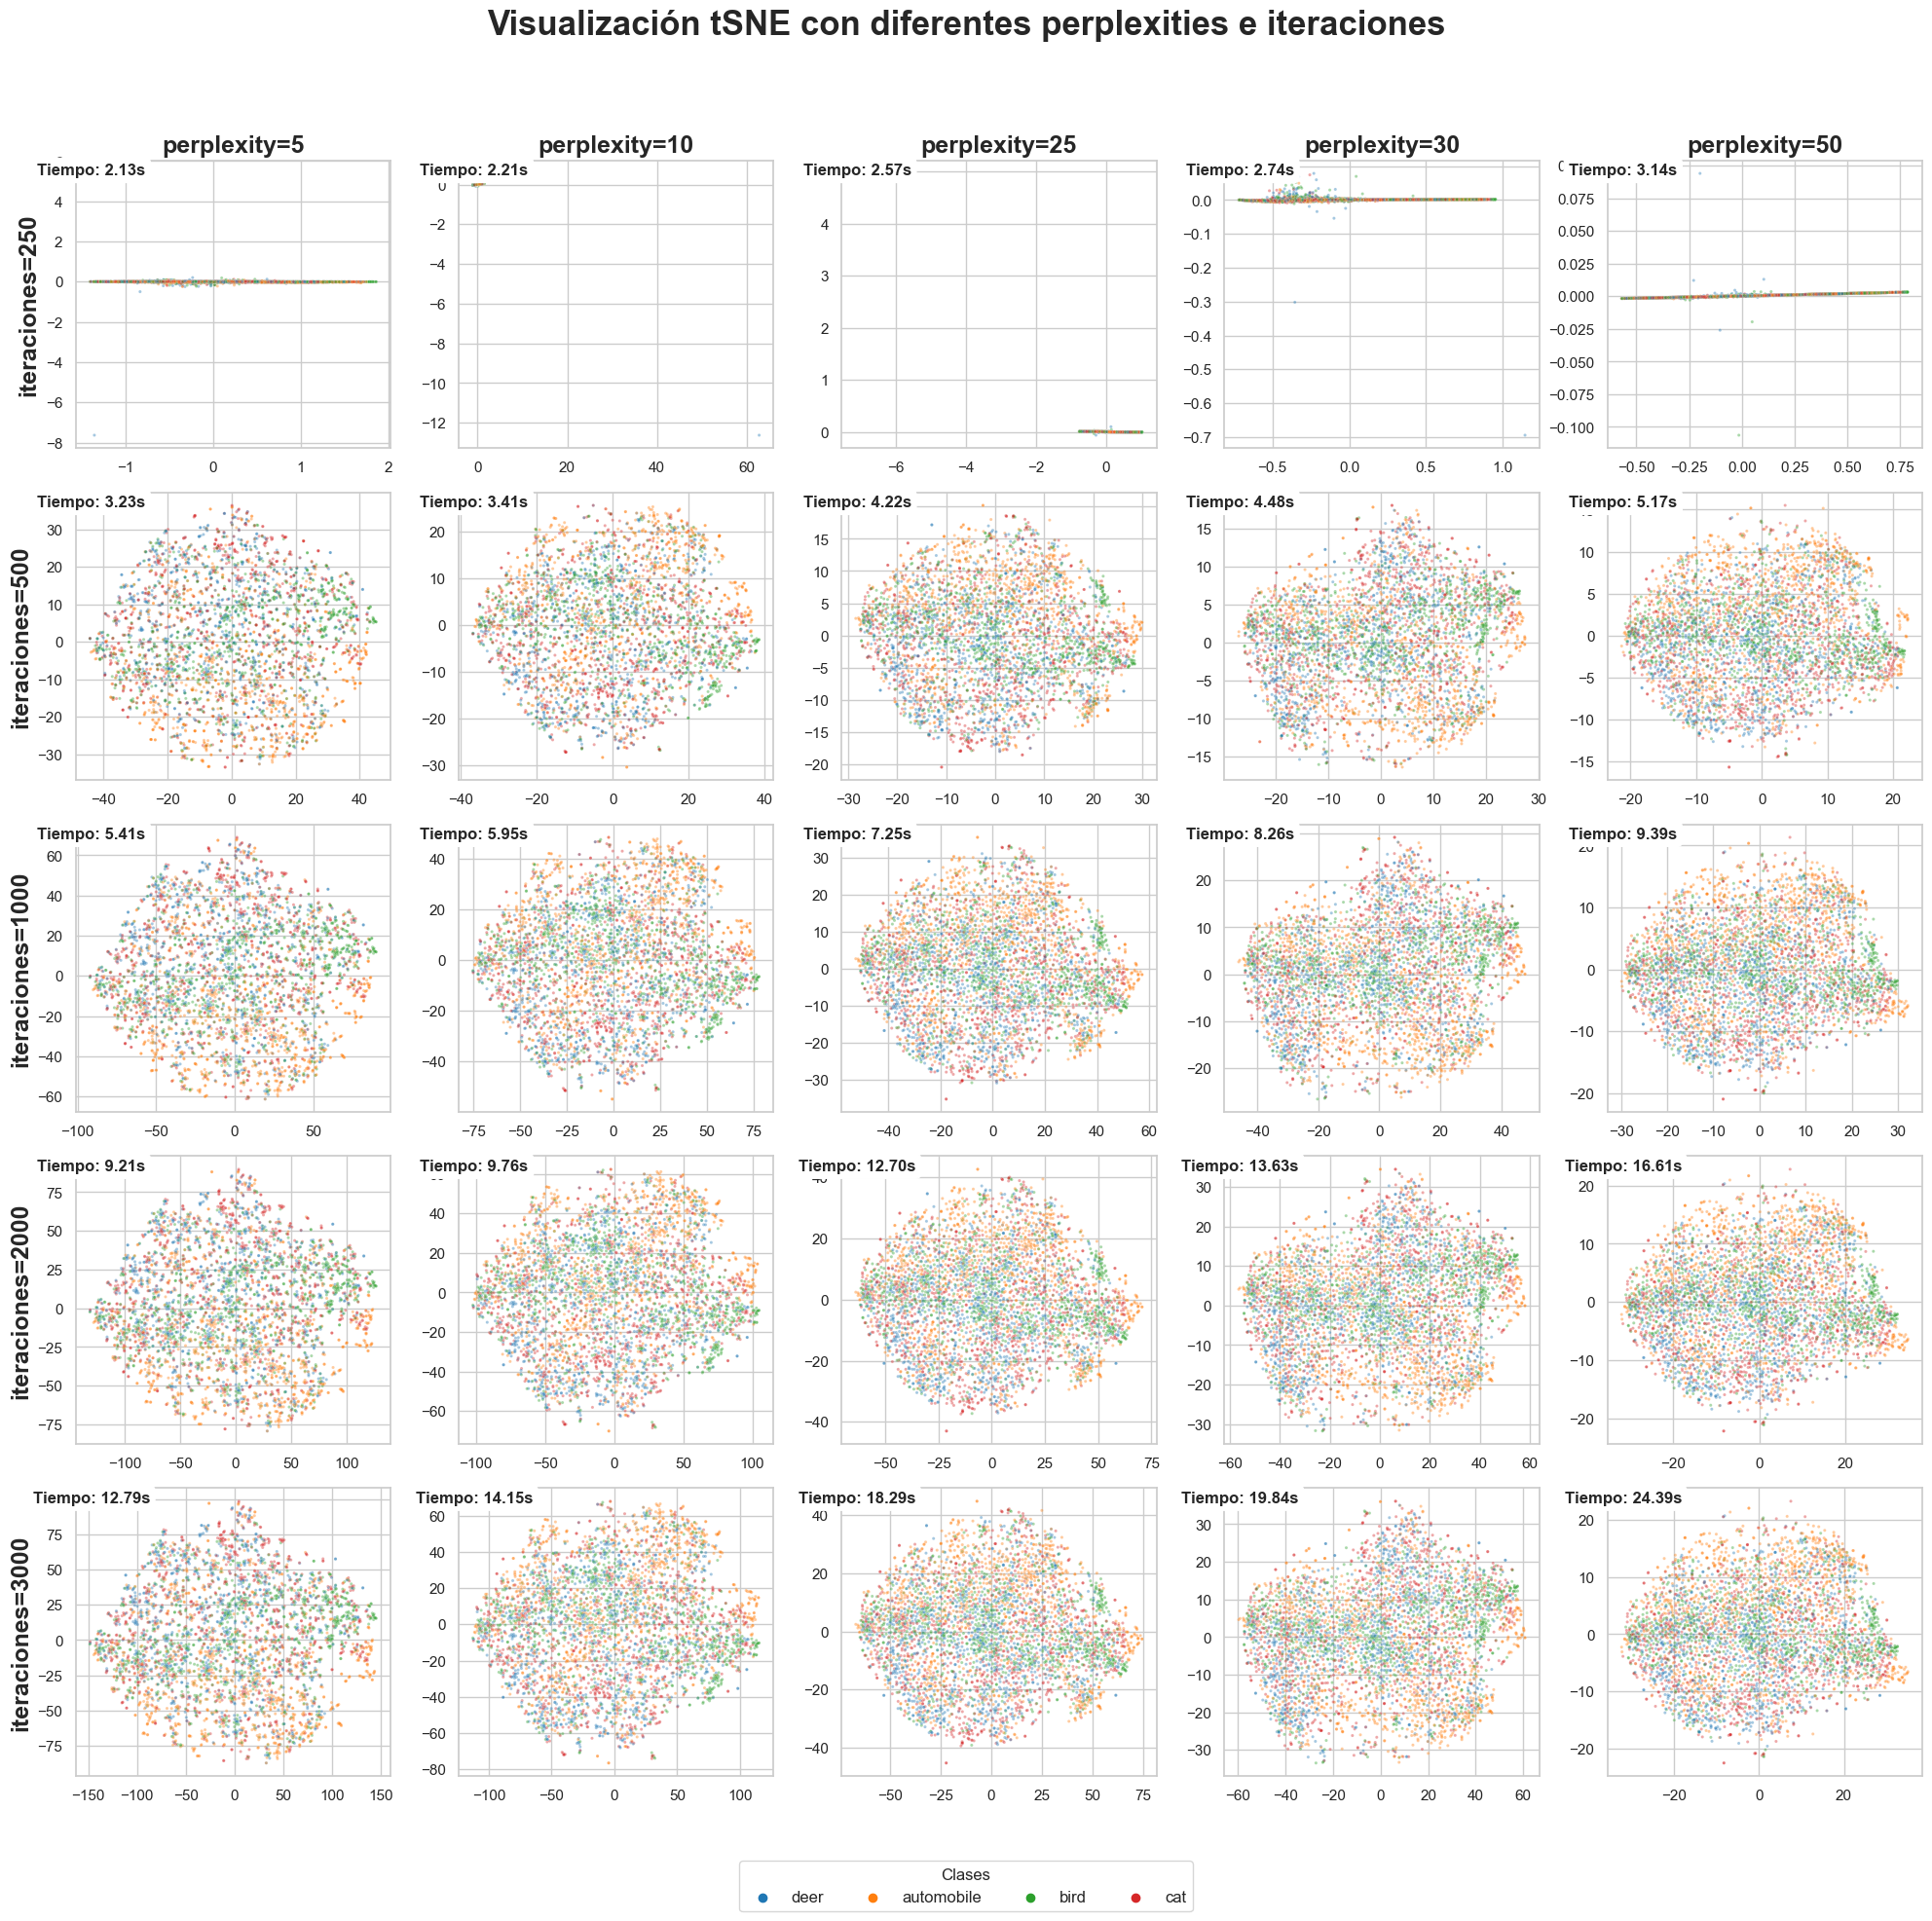

In [ ]:
fig, axes = plt.subplots(len(iters_to_test), len(perplexities_to_test), figsize=(20, 20))
fig.suptitle('Visualización tSNE con diferentes perplexities e iteraciones', fontsize=25, weight='bold')

for i, n_iters in enumerate(iters_to_test):
    for j, perplexity in enumerate(perplexities_to_test):

        # Iniciar el cronómetro
        start_time = time.time()

        # Crear un modelo t-SNE
        tsne_model = TSNE(
            n_components=2,
            perplexity=perplexity,
            n_iter=n_iters,
            learning_rate='auto',
            init='pca',
            random_state=8
        )

        # Ajustar el modelo t-SNE a los datos
        X_tsne_2 = tsne_model.fit_transform(X)

        # Detener el cronómetro y calcular el tiempo de ejecución
        end_time = time.time()
        execution_time = end_time - start_time

        # Crear un DataFrame para la visualización
        df_tsne = pd.DataFrame({
            'x_1': X_tsne_2[:, 0],
            'x_2': X_tsne_2[:, 1],
            'Clase': [fine_label_names[k] for k in y]
        })

        # Crear un gráfico de dispersión
        ax = axes[i, j]
        sns.scatterplot(
            data=df_tsne,
            x='x_1',
            y='x_2',
            hue='Clase',
            alpha=0.4,
            ax=ax,
            s=5
        )

        # Configurar el gráfico
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.legend().set_visible(False)
        ax.grid(True)
        # No es común fijar los límites en t-SNE ya que las escalas pueden variar significativamente
        # ax.set_xlim(-6, 12)
        # ax.set_ylim(-4, 12)

        # Añadir el tiempo de ejecución como una anotación
        ax.annotate(f'Tiempo: {execution_time:.2f}s',
                    xy=(0.05, 0.95),  # Coordenadas donde colocar la anotación (x, y) - esquina superior izquierda
                    xycoords='axes fraction', # Sistema de coordenadas (fracciones del eje)
                    fontsize=12,
                    ha='center',        # Alineación horizontal
                    weight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor="white", facecolor="white"))

# Añadir etiquetas en los bordes para mejor claridad
for ax, perplexity in zip(axes[0, :], perplexities_to_test):
    ax.set_title(f'perplexity={perplexity}', fontsize=18, weight='bold')
for ax, iters in zip(axes[:, 0], iters_to_test):
    ax.set_ylabel(f'iteraciones={iters}', fontsize=18, weight='bold')

# Añadir una leyenda común al final
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(fine_label_names), fontsize=12, bbox_to_anchor=(0.5, -0.001), bbox_transform=fig.transFigure, title="Clases")


plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Ajustar para que no se superpongan los títulos y la leyenda

# Guardar la figura
plt.savefig(os.path.join(resultados_path, "svg", 'comparacion-perplexities-iteraciones.svg'), format='svg')

plt.show()